In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

if not os.path.exists('/content/drive/My Drive/kaggle.json'):
  print('Kaggle API key not found. Please upload kaggle.json to your Google Drive.')
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'

#

# **Download Dataset:** [IMDB dataset having 50K movie reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [8]:
## Downloading the data set from kaggle using kaggle api
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 93% 24.0M/25.7M [00:00<00:00, 135MB/s] 
100% 25.7M/25.7M [00:00<00:00, 125MB/s]


In [9]:
!unzip \*.zip && rm *.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [10]:
import pandas as pd
df =  pd.read_csv('/content/IMDB Dataset.csv')

In [11]:
data = df.copy()

In [12]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [13]:
## Initilizing Stop_words
import nltk
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
#Initilizing the Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer =  WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [73]:
## Cleaning the data & Initilizing the Lemmatizer
import re
corpus = []

for i in range(0, len(data)):
    review = re.sub(r'[^a-zA-Z\s]', ' ', data['review'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if word not in stopword_list and word != 'not']
    review = ' '.join(review)

    corpus.append(review)

In [74]:
X = corpus
y = data['sentiment']

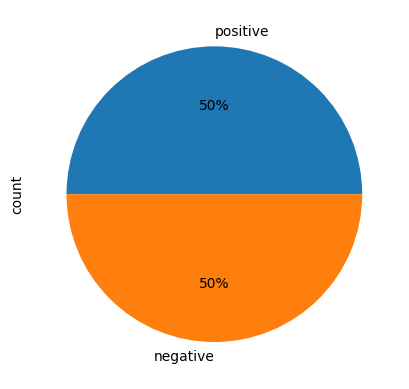

In [26]:
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [83]:
# Calculate the word count for each review
data.loc[:, 'word_counts'] = data['review'].apply(lambda x: len(x.split()))

# Calculate the average word length for each review
data.loc[:, 'avg_wordlength'] = data['review'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# Calculate the number of stopwords in each review
data.loc[:, 'stopwords_count'] = data['review'].apply(lambda x: sum(word in stopword_list for word in x.split()) if x != 'not' else 0)

# Create the char_counts variable
data.loc[:, 'char_counts'] = data['review'].apply(len)

# Assign corpus to new_review (if corpus is a list of reviews)
data.loc[:, 'new_review'] = corpus


In [84]:
data.head()

,review,sentiment,word_counts,avg_wordlength,stopwords_count,char_counts,new_review
0,One of the other reviewers has mentioned that ...,positive,307,4.739414,122,1761,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,162,5.166667,62,998,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,166,4.584337,70,926,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,138,4.427536,58,748,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,4.730435,92,1317,petter mattei love time money visually stunnin...


In [ ]:
# # drop the colum data['review']
# data.drop('review', axis=1, inplace=True)

In [ ]:
# ## code save this /content/IMDB_cleaned_data.csv dataset into the drive
# data.to_csv('IMDB_cleaned_data.csv', index=False)

# # Specify the path to the CSV file in Colab
# csv_path = '/content/IMDB_cleaned_dataset.csv'

# # Specify the destination path in your Google Drive
# destination_path = '/content/drive/MyDrive/IMDB_cleaned_dataset.csv'

# # Copy the file from Colab to Drive
# !cp {csv_path} {destination_path}

In [ ]:
# ## download the file from /content/IMDB_cleaned_data.csv this

# from google.colab import files
# files.download('/content/IMDB_cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

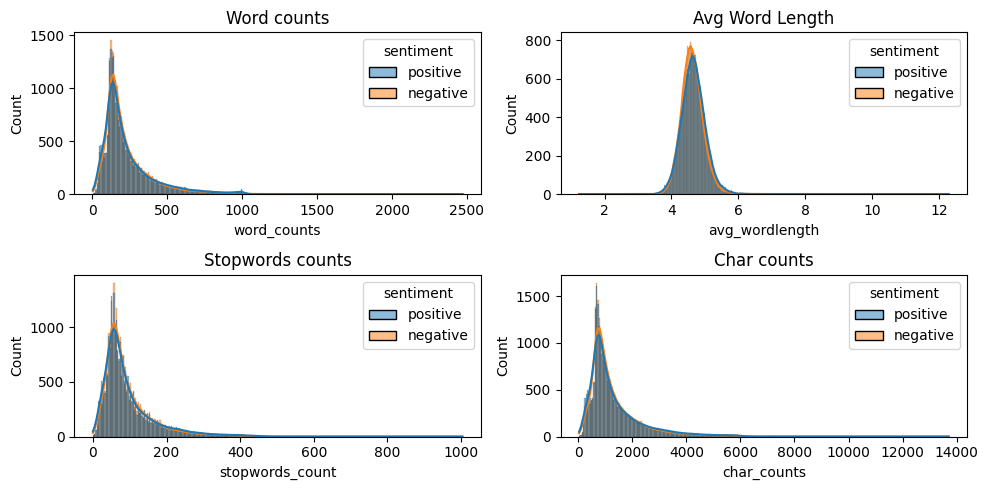

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=data, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=data, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,3)
sns.histplot(data=data, x='stopwords_count', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.subplot(2,2,4)
sns.histplot(data=data, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.tight_layout()
plt.show()

In [ ]:
# !pip install wordcloud

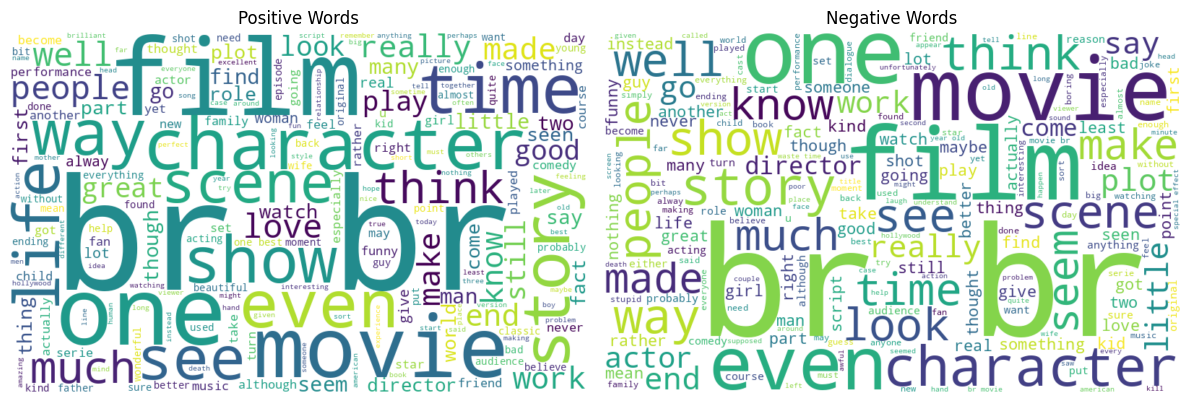

In [87]:
#show the word cloud for positive words, negative words from corpus

from wordcloud import WordCloud

# Create a WordCloud object for positive words
positive_words = ' '.join([word for word in corpus if data['sentiment'][corpus.index(word)] == 'positive'])
positive_wordcloud = WordCloud(width=800, height=500, background_color='white').generate(positive_words)

# Create a WordCloud object for negative words
negative_words = ' '.join([word for word in corpus if data['sentiment'][corpus.index(word)] == 'negative'])
negative_wordcloud = WordCloud(width=800, height=500, background_color='white').generate(negative_words)

# Display the word clouds
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')

plt.subplot(1,2,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')

plt.tight_layout()
plt.show()


In [88]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0,
                                                    stratify=data['sentiment'])

# Initilizing & Trainning the model

In [89]:
#Initilizing Pipeline, TF-IDF, SVM
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Initilizing the model
model = Pipeline([('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

# Fit the model
model.fit((X_train), y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

In [90]:
# Make predictions
y_pred = model.predict(X_test)

In [91]:
# Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'score: {accuracy_score(y_test,y_pred)}\n')
print(f'Report: {classification_report(y_pred,y_test)}')

score: 0.8967

Report:               precision    recall  f1-score   support

    negative       0.89      0.90      0.90      4925
    positive       0.90      0.89      0.90      5075

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [92]:
model.predict(['Wow, this is amazing'])

array(['positive'], dtype=object)

In [93]:
model.predict(["This is bad"])

array(['negative'], dtype=object)

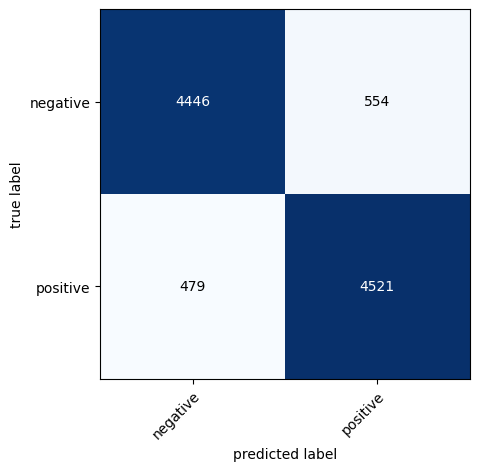

In [94]:
# Plot the confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=model.classes_)
plt.show()

In [95]:
import pickle

pickle.dump(model, open('IMDB_sentiment_analysis.pkl', 'wb'))

In [96]:
# Download the file from Google Colab (IMDB_sentiment_analysis.pkl)
from google.colab import files
files.download('IMDB_sentiment_analysis.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>